In [1]:
%matplotlib inline

/Users/dave/.pyenv/versions/anaconda-2.4.0/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [3]:
# read in data
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

`Id` is a unique identifier and `SalePrice` is our target variable.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# combine train and test to ease transformations
combined = train.append(test, ignore_index=True)
combined.drop(['Id', 'SalePrice'], axis=1, inplace=True)

/Users/dave/.pyenv/versions/anaconda-2.4.0/lib/python2.7/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/dave/.pyenv/versions/anaconda-2.4.0/lib/python2.7/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


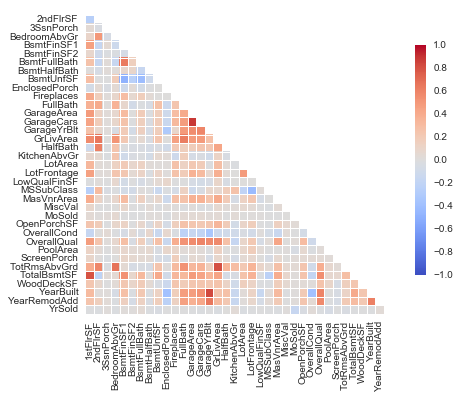

In [6]:
sns.corrplot(combined, annot=False, diag_names=False);

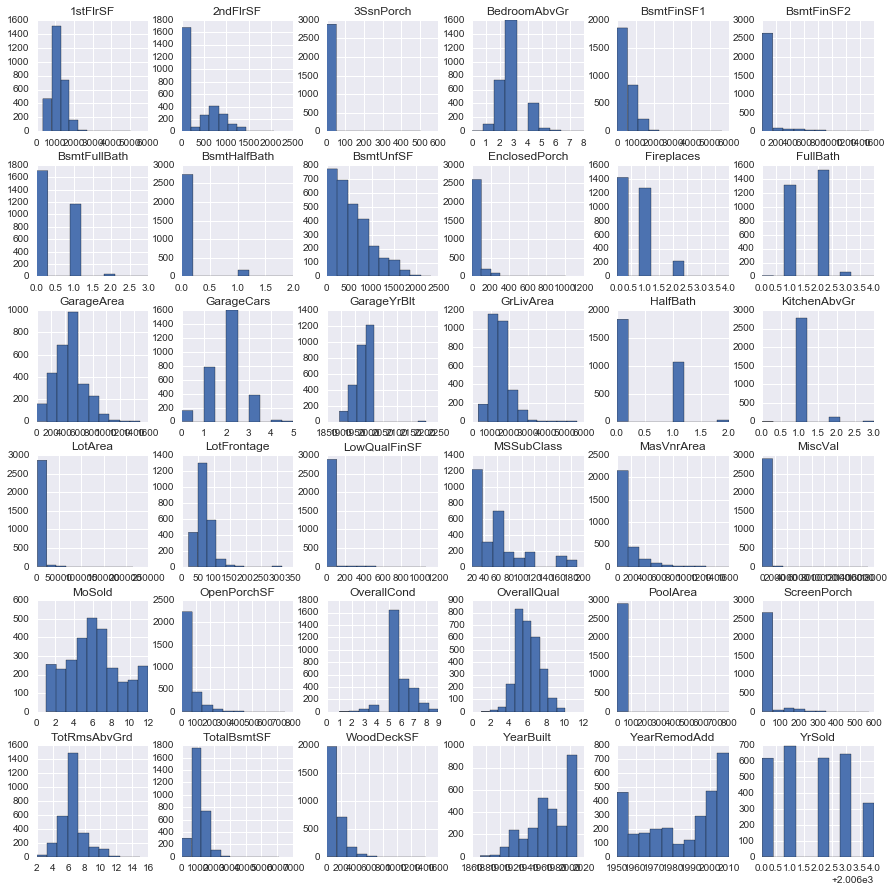

In [7]:
combined.hist(figsize=[15,15]);

skew: 1.880941


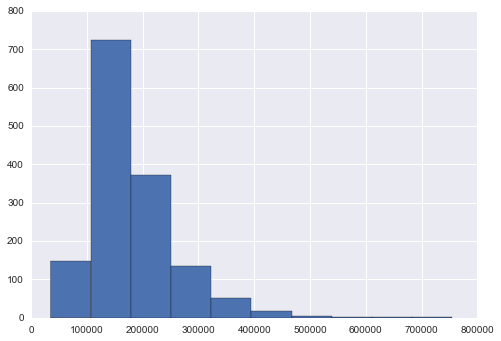

In [10]:
print ('skew: {:f}'.format(skew(train.SalePrice)))
train.SalePrice.hist();

skew: 0.121210


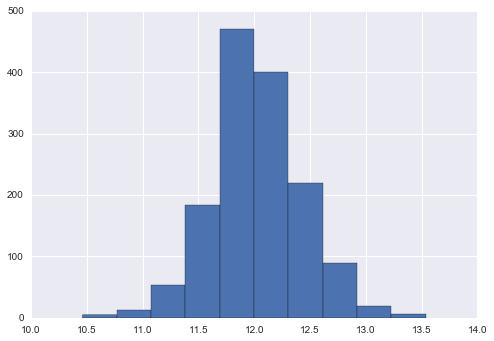

In [11]:
print 'skew: {:f}'.format(skew(np.log(train.SalePrice)))
np.log(train.SalePrice).hist();

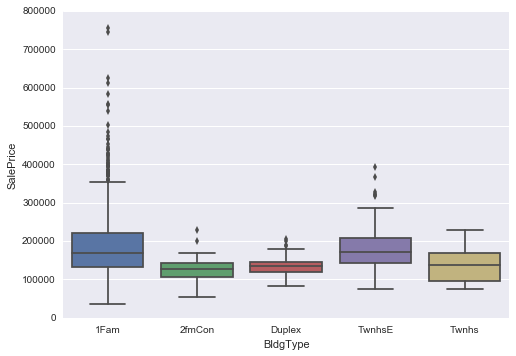

In [12]:
sns.boxplot(x="BldgType", y="SalePrice", data=train);

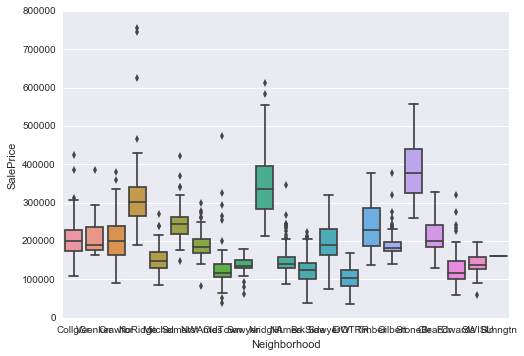

In [21]:
sns.boxplot(x="Neighborhood", y="SalePrice", data=train[train.BldgType == '1Fam']);

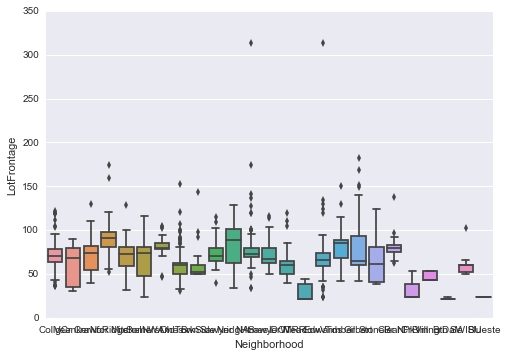

In [7]:
sns.boxplot(x="Neighborhood", y="LotFrontage", data=train);

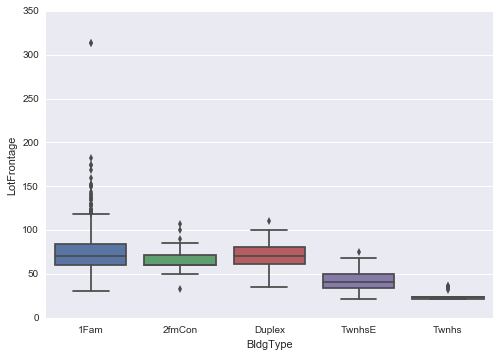

In [9]:
sns.boxplot(x="BldgType", y="LotFrontage", data=train);

In [15]:
numeric_columns = train.dtypes[train.dtypes != 'object'].index.drop(['Id','SalePrice'])

In [19]:
train[numeric_columns].apply(skew)

MSSubClass        1.406210
LotFrontage            NaN
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea             NaN
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt            NaN
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
MoSold            0.211835
YrSold            0.096170
dtype: float64